In [1]:
import os
import time
import librosa
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import *

import tensorflow as tf
from tensorflow.keras import *
from tensorflow.keras.callbacks import *

import warnings
warnings.filterwarnings('ignore')

In [2]:
os.chdir('E:\Data')

In [3]:
path = os.getcwd() + '/mean_60k_128_features/'
path

'E:\\Data/mean_60k_128_features/'

In [4]:
TRAINING_DIR = path+"/train"
VALIDATION_DIR = path + "/val"
TEST_DIR = path + "/test"

print(TRAINING_DIR)
print(VALIDATION_DIR)
print(TEST_DIR)

E:\Data/mean_60k_128_features//train
E:\Data/mean_60k_128_features//val
E:\Data/mean_60k_128_features//test


In [5]:
def data_loader(path):
    X = []
    Y = []
    for folder in os.listdir(path):
        for file in os.listdir(os.path.join(path, folder)):
            feature = np.load(os.path.join(path, folder, file))
            label = folder
            X += feature.tolist()
            Y += [label]*feature.shape[0]
    return X, Y

In [6]:
X_train, Y_train = data_loader(TRAINING_DIR)
X_val, Y_val = data_loader(VALIDATION_DIR)
X_test, Y_test = data_loader(TEST_DIR)

In [7]:
print("There are {} training samples and {} training labels".format(len(X_train), len(Y_train)))
print("There are {} validation samples and {} validation labels".format(len(X_val), len(Y_val)))
print("There are {} testing samples and {} testing labels".format(len(X_test), len(Y_test)))

There are 39999 training samples and 39999 training labels
There are 10000 validation samples and 10000 validation labels
There are 10000 testing samples and 10000 testing labels


In [8]:
X_train = np.array(X_train)
X_val = np.array(X_val)
X_test = np.array(X_test)
Y_train = np.array(Y_train)
Y_val = np.array(Y_val)
Y_test = np.array(Y_test)

print("Shape of X_train: {}".format(X_train.shape))
print("Shape of X_val: {}".format(X_val.shape))
print("Shape of X_test: {}".format(X_test.shape))
print("Shape of Y_train: {}".format(Y_train.shape))
print("Shape of Y_val: {}".format(Y_val.shape))
print("Shape of Y_test: {}".format(Y_test.shape))

Shape of X_train: (39999, 128)
Shape of X_val: (10000, 128)
Shape of X_test: (10000, 128)
Shape of Y_train: (39999,)
Shape of Y_val: (10000,)
Shape of Y_test: (10000,)


In [9]:
label_encoder = LabelEncoder()
Y_train = label_encoder.fit_transform(Y_train)
Y_val = label_encoder.fit_transform(Y_val)
Y_test = label_encoder.fit_transform(Y_test)
print(np.unique(Y_train))

std = StandardScaler()
std_scaler = StandardScaler()
X_train = std_scaler.fit_transform(X_train)
X_val = std_scaler.transform(X_val)
X_test = std_scaler.transform(X_test)
print(X_train[0:5, 0:5])

[0 1]
[[ 3.0387421   1.10703328 -0.26579831 -0.31731575 -0.2047964 ]
 [-0.40839213 -0.33829006 -0.29045444 -0.24476206 -0.22357892]
 [-0.45129891 -0.39434124 -0.30517152 -0.27279159 -0.130309  ]
 [-0.44212636 -0.36055984 -0.26126742 -0.18534265 -0.1654841 ]
 [-0.31978903 -0.42315087 -0.35648306 -0.36680775 -0.28844816]]


In [10]:
# shuffle the dataset
shuffle_index = np.random.permutation(len(X_train))
X_train, Y_train = X_train[shuffle_index], Y_train[shuffle_index]
shuffle_index = np.random.permutation(len(X_val))
X_val, Y_val = X_val[shuffle_index], Y_val[shuffle_index]
shuffle_index = np.random.permutation(len(X_test))
X_test, Y_test = X_test[shuffle_index], Y_test[shuffle_index]

In [11]:
# Reshape the input data
X_train = X_train.reshape( (X_train.shape[0], X_train.shape[1], 1) )
X_val = X_val.reshape( (X_val.shape[0], X_val.shape[1], 1) )
X_test = X_test.reshape( (X_test.shape[0], X_test.shape[1], 1) )
Y_train = Y_train.reshape( (Y_train.shape[0], 1) )
Y_val = Y_val.reshape( (Y_val.shape[0], 1) )
Y_test = Y_test.reshape( (Y_test.shape[0], 1) )

print("Shape of X_train: {}".format(X_train.shape))
print("Shape of X_val: {}".format(X_val.shape))
print("Shape of X_test: {}".format(X_test.shape))
print("Shape of Y_train: {}".format(Y_train.shape))
print("Shape of Y_val: {}".format(Y_val.shape))
print("Shape of Y_test: {}".format(Y_test.shape))

Shape of X_train: (39999, 128, 1)
Shape of X_val: (10000, 128, 1)
Shape of X_test: (10000, 128, 1)
Shape of Y_train: (39999, 1)
Shape of Y_val: (10000, 1)
Shape of Y_test: (10000, 1)


In [12]:
model = Sequential([
    layers.Input(shape=(X_train.shape[1:])),
    layers.Conv1D(512, 3, activation='relu'),
    layers.MaxPooling1D(2),
    layers.Conv1D(512, 3, activation='relu'),
    layers.MaxPooling1D(2),
    layers.Conv1D(1024, 3, activation='relu'),
    layers.MaxPooling1D(2),
    layers.Conv1D(1024, 3, activation='relu'),
    layers.MaxPooling1D(2),
    layers.Flatten(),
    layers.Dropout(0.2),
    layers.Dense(1024, activation='relu'),
    layers.Dropout(0.2),
    layers.Dense(512, activation='relu'),
    layers.Dropout(0.2),
    layers.Dense(1, activation='sigmoid')
])

In [13]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
              loss='binary_crossentropy',
              metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 126, 512)          2048      
                                                                 
 max_pooling1d (MaxPooling1D  (None, 63, 512)          0         
 )                                                               
                                                                 
 conv1d_1 (Conv1D)           (None, 61, 512)           786944    
                                                                 
 max_pooling1d_1 (MaxPooling  (None, 30, 512)          0         
 1D)                                                             
                                                                 
 conv1d_2 (Conv1D)           (None, 28, 1024)          1573888   
                                                                 
 max_pooling1d_2 (MaxPooling  (None, 14, 1024)         0

In [14]:
earlystopper = EarlyStopping(
    monitor='val_loss',
    patience=20,
    restore_best_weights=True
)

In [15]:
epochs = 300
batch_size = 32
current_time = int(time.time())
stop_training_callback = earlystopper
history = model.fit(X_train, Y_train, 
                    epochs=epochs, 
                    batch_size=batch_size,
                    validation_data=(X_val, Y_val), 
                    callbacks=[stop_training_callback])
print("Training completed in {} seconds.".format(int(time.time()-current_time)))

Epoch 1/300
1250/1250 [==============================] - 48s 25ms/step - loss: 0.3734 - accuracy: 0.8189 - val_loss: 0.2133 - val_accuracy: 0.9146
Epoch 2/300
1250/1250 [==============================] - 30s 24ms/step - loss: 0.1887 - accuracy: 0.9225 - val_loss: 0.1726 - val_accuracy: 0.9269
Epoch 3/300
1250/1250 [==============================] - 30s 24ms/step - loss: 0.1374 - accuracy: 0.9447 - val_loss: 0.1078 - val_accuracy: 0.9577
Epoch 4/300
1250/1250 [==============================] - 30s 24ms/step - loss: 0.1083 - accuracy: 0.9569 - val_loss: 0.1033 - val_accuracy: 0.9576
Epoch 5/300
1250/1250 [==============================] - 30s 24ms/step - loss: 0.0874 - accuracy: 0.9661 - val_loss: 0.0819 - val_accuracy: 0.9688
Epoch 6/300
1250/1250 [==============================] - 30s 24ms/step - loss: 0.0753 - accuracy: 0.9706 - val_loss: 0.0917 - val_accuracy: 0.9651
Epoch 7/300
1250/1250 [==============================] - 31s 24ms/step - loss: 0.0643 - accuracy: 0.9737 - val_loss: 0

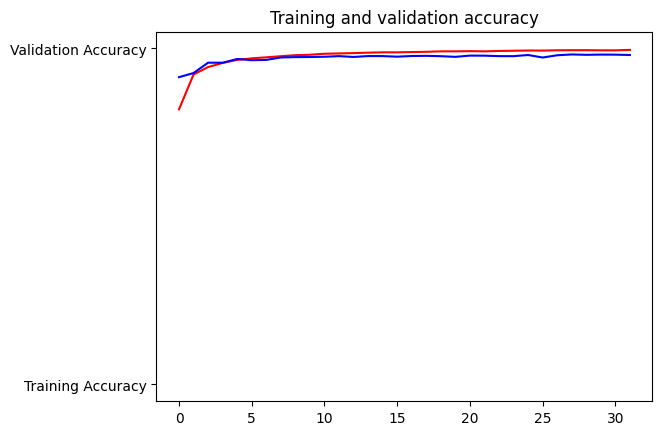

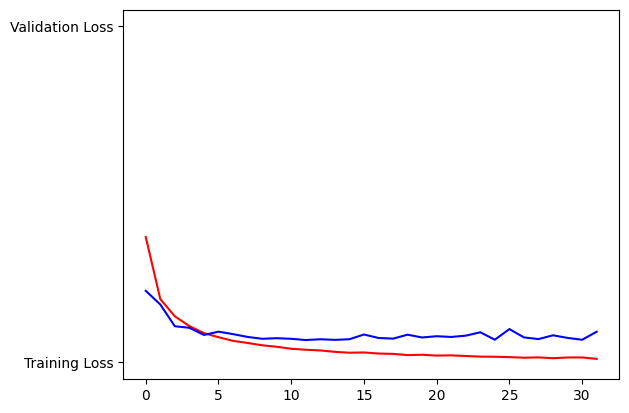

In [16]:
acc=history.history['accuracy']
val_acc=history.history['val_accuracy']
loss=history.history['loss']
val_loss=history.history['val_loss']

epochs=range(len(acc))

plt.plot(epochs, acc, 'r', "Training Accuracy")
plt.plot(epochs, val_acc, 'b', "Validation Accuracy")
plt.title('Training and validation accuracy')
plt.show()
print("")

plt.plot(epochs, loss, 'r', "Training Loss")
plt.plot(epochs, val_loss, 'b', "Validation Loss")
plt.show()

In [17]:
test_predict = model.predict(X_test)

313/313 [==============================] - 2s 6ms/step


In [18]:
test_score = roc_auc_score(Y_test, test_predict)
print(f"StackNet AUC on testing set: {round(test_score, 4)}")

StackNet AUC on testing set: 0.9978


In [19]:
show_test_predict = np.round(test_predict, 0)
show_test_predict = pd.DataFrame(show_test_predict)
print(show_test_predict)
print(len(show_test_predict))

        0
0     0.0
1     0.0
2     0.0
3     1.0
4     0.0
...   ...
9995  1.0
9996  0.0
9997  0.0
9998  1.0
9999  0.0

[10000 rows x 1 columns]
10000


In [20]:
def plot_confusion_matrix(cm, title):
    df_cm = pd.DataFrame(cm, index = [i for i in ['Queen', 'Queenless']],
                    columns = [i for i in ['Queen', 'Queenless']])
    df_cm_normed = df_cm/df_cm.sum()
    plt.figure(figsize = (10,7))
    sns.heatmap(df_cm, annot=True, fmt="", )
    plt.title(title)
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.savefig(title + ".png")
    plt.show()

def plot_roc_curve(Y_test, test_predict, title):
    fpr, tpr, thresholds = roc_curve(Y_test, test_predict)

    aucc = auc(fpr, tpr)

    plt.plot(fpr, tpr, label="ROC curve (area = {0:.4f})".format(aucc))
    plt.plot([0, 1], [0, 1], linestyle="dashed")
    plt.title(title)
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.savefig(title + ".png")
    plt.legend()
    plt.show()

In [21]:
os.chdir('E:\Data')

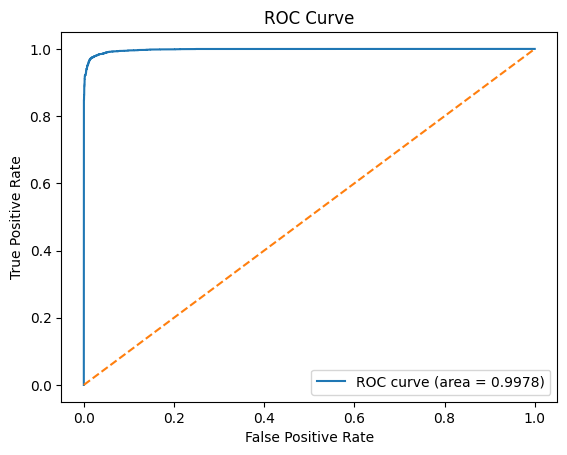

In [22]:
plot_roc_curve(Y_test, test_predict, "ROC Curve")

In [23]:
from sklearn.metrics import f1_score
f1_score(Y_test, show_test_predict, average='macro')

0.9764971042082096

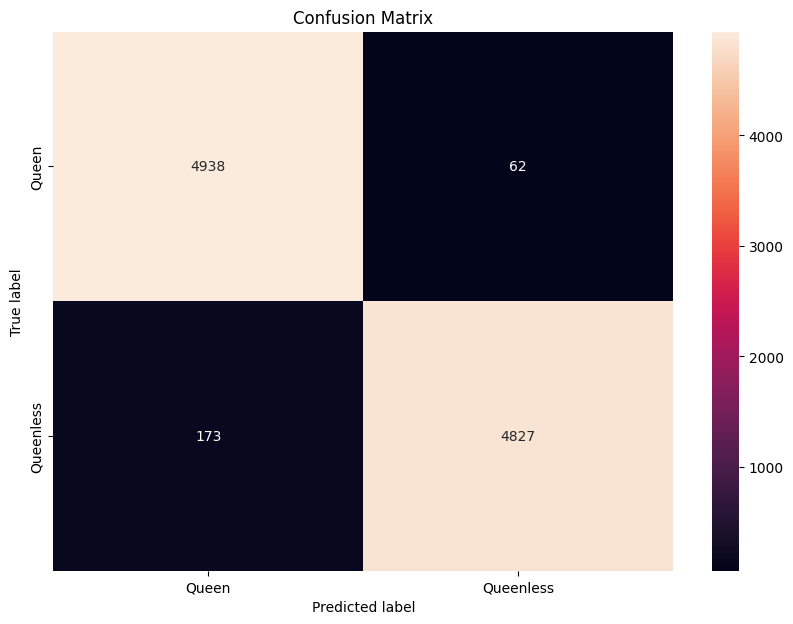

In [24]:
cm = confusion_matrix(Y_test, show_test_predict)
plot_confusion_matrix(cm, "Confusion Matrix")

In [25]:
stt = model.evaluate(X_test, Y_test)
print(stt)

313/313 [==============================] - 2s 7ms/step - loss: 0.0640 - accuracy: 0.9765
[0.06401004642248154, 0.9764999747276306]


In [26]:
print(classification_report(Y_test, show_test_predict))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98      5000
           1       0.99      0.97      0.98      5000

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000



In [27]:
model.save("128_STFT_CNN_1D_Test01.h5")